# Intro Deep Learning

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2026-02-05 18:08:58.899745: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-05 18:08:59.245974: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/sofi/miniconda3/envs/school/lib/python3.11/site-packages/tensorflow/python/keras/engine/training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top
2026-02-05 18:09:01.391979: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17503730925427395190
xla_global_id: -1
]
2.20.0
Num GPUs Available:  0


2026-02-05 18:09:02.763459: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# Preprocessing
- One-hot labels
- Reshape and normalize data

In [2]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
y_test

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

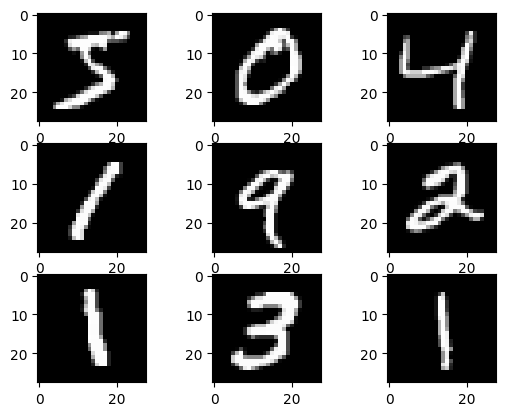

In [4]:
from matplotlib import pyplot
import numpy as np

# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [5]:
X_train.shape[1]

28

In [6]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size

# resize and normalize
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

# MLP Model

## Hyperparameters

In [28]:
batch_size = 256
hidden_units = 256
dropout = 0.3

In [34]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout


model = Sequential(name="YAYY")

model.add(Dense(hidden_units, input_dim=input_size, activation = "tanh"))
model.add(Dropout(dropout))

#En esta, no se especifican las hidden_units porque las hereda de la capa anterior.
model.add(Dense(hidden_units, activation = "relu"))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "YAYY"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy',"precision"]
)

In [36]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split = .1,
    epochs = 20,
    batch_size=batch_size,
)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8736 - loss: 0.4276 - precision: 0.9269 - val_accuracy: 0.9550 - val_loss: 0.1553 - val_precision: 0.9657
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9347 - loss: 0.2127 - precision: 0.9493 - val_accuracy: 0.9655 - val_loss: 0.1250 - val_precision: 0.9721
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9509 - loss: 0.1625 - precision: 0.9605 - val_accuracy: 0.9725 - val_loss: 0.0922 - val_precision: 0.9788
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9568 - loss: 0.1375 - precision: 0.9644 - val_accuracy: 0.9752 - val_loss: 0.0828 - val_precision: 0.9798
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9621 - loss: 0.1194 - precision: 0.9687 - val_accuracy: 0.9773 - val_loss: 0.0781 - val_precision: 0.9804
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9662 - loss: 0.1071 - precision: 0.9716 - val_accuracy: 0.9792 - val_loss:

dict_keys(['accuracy', 'loss', 'precision', 'val_accuracy', 'val_loss', 'val_precision'])


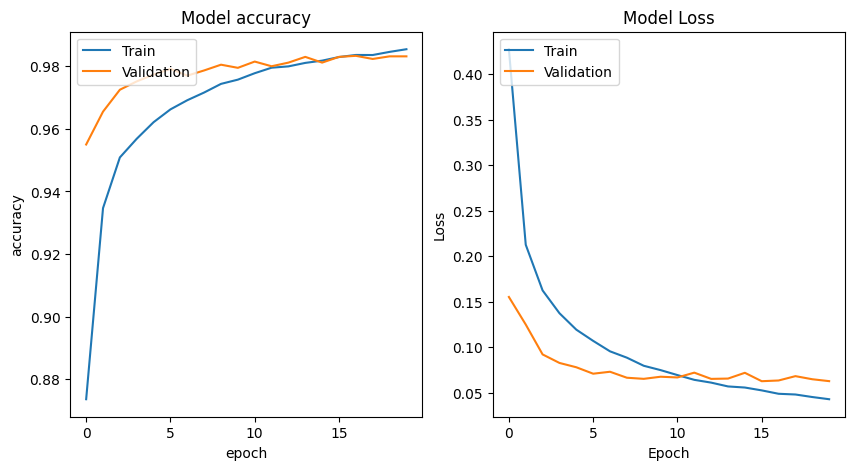

In [37]:
import matplotlib.pyplot as plt

def plot_history(history):

    plt.figure(figsize=(10, 5))

    # summarize history for mean_squared_error
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

print(history.history.keys())
plot_history(history)

## Model Evaluation

In [38]:
_, acc, foo = model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    verbose=0
)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.2%


## Save Model

In [20]:
model.save('MLP_MNIST.h5')

## Load Model

In [23]:
reconstructed_model = tf.keras.models.load_model("MLP_MNIST.h5")
_, acc, foo = reconstructed_model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.0704 - precision_2: 0.9831

Test accuracy: 98.2%


# CNN Model

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
img_channels = 1

# resize and normalize
X_train = np.reshape(X_train, [-1, image_size, image_size, img_channels])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, image_size, image_size, img_channels])
X_test = X_test.astype('float32') / 255


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## Model

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

num_labels = 10
input_size = 28 * 28

model = Sequential(name = "CNN")

model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation = "softmax"))
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    # train_generator,
    x = X_train,
    y = y_train,
    validation_split = .1,
    epochs = 10,
    verbose = True
)

In [ ]:
plot_history(history)

In [ ]:
_, acc = model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    verbose=0
)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
	featurewise_center=True,
	featurewise_std_normalization=True,
	rotation_range=10,
	horizontal_flip=False,
	validation_split = 0.1
	# vertical_flip=True
)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
datagen.fit(X_train)
train_generator = datagen.flow(X_train, y_train, batch_size=128, subset='training')
validation_generator = datagen.flow(X_train, y_train, batch_size=128, subset='validation')

In [ ]:
model = Sequential(name = "CNN_DA")
model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation = "softmax"))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs = 10,
    verbose = True,
    validation_data = validation_generator
)

In [ ]:
plot_history(history)

In [ ]:
_, acc = model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    verbose=0
)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

# Serializing Model

In [ ]:
model.save('CNN_MNIST.h5')

## Load Model

In [ ]:
reconstructed_model = tf.keras.models.load_model("CNN_MNIST.h5")

In [ ]:
reconstructed_model.evaluate(X_test, y_test)